In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.7 MB/s eta 0:00:27
   - -------------------------------------- 1.8/72.0 MB 3.2 MB/s eta 0:00:22
   - -------------------------------------- 2.6/72.0 MB 3.3 MB/s eta 0:00:22
   -- ------------------------------------- 3.7/72.0 MB 3.3 MB/s eta 0:00:21
   -- ------------------------------------- 4.7/72.0 MB 3.4 MB/s eta 0:00:20
   -- ------------------------------------- 5.0/72.0 MB 3.0 MB/s eta 0:00:23
   -- ------------------------------------- 5.0/72.0 MB 3.0 MB/s eta 0:00:23
   --- ------------------------------------ 6.3/72.0 MB 3.0 MB/s eta 0:00:23
   --- ------------------------------------ 6.6/72.0 MB 2.9 MB/s eta 0:00:23
   ---- ----------------------------------- 7.6/72.0 MB 3.0 MB/s eta 0:00:22
   ---- ----------------------------------- 8.9/72.0 MB 3.1 MB/s eta 0:00:21
   ----- ----

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.preprocessing import PolynomialFeatures

# Imbalanced Learning
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                            f1_score, accuracy_score, precision_score, recall_score,
                            roc_curve, precision_recall_curve, auc)
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [5]:
df=pd.read_csv('creditcard_2023.csv')

In [6]:
print(f"\n📊 Dataset Shape: {df.shape}") 

display(df.head())

print("\nℹ️ Dataset Info:")
df.info()


📊 Dataset Shape: (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0



ℹ️ Dataset Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

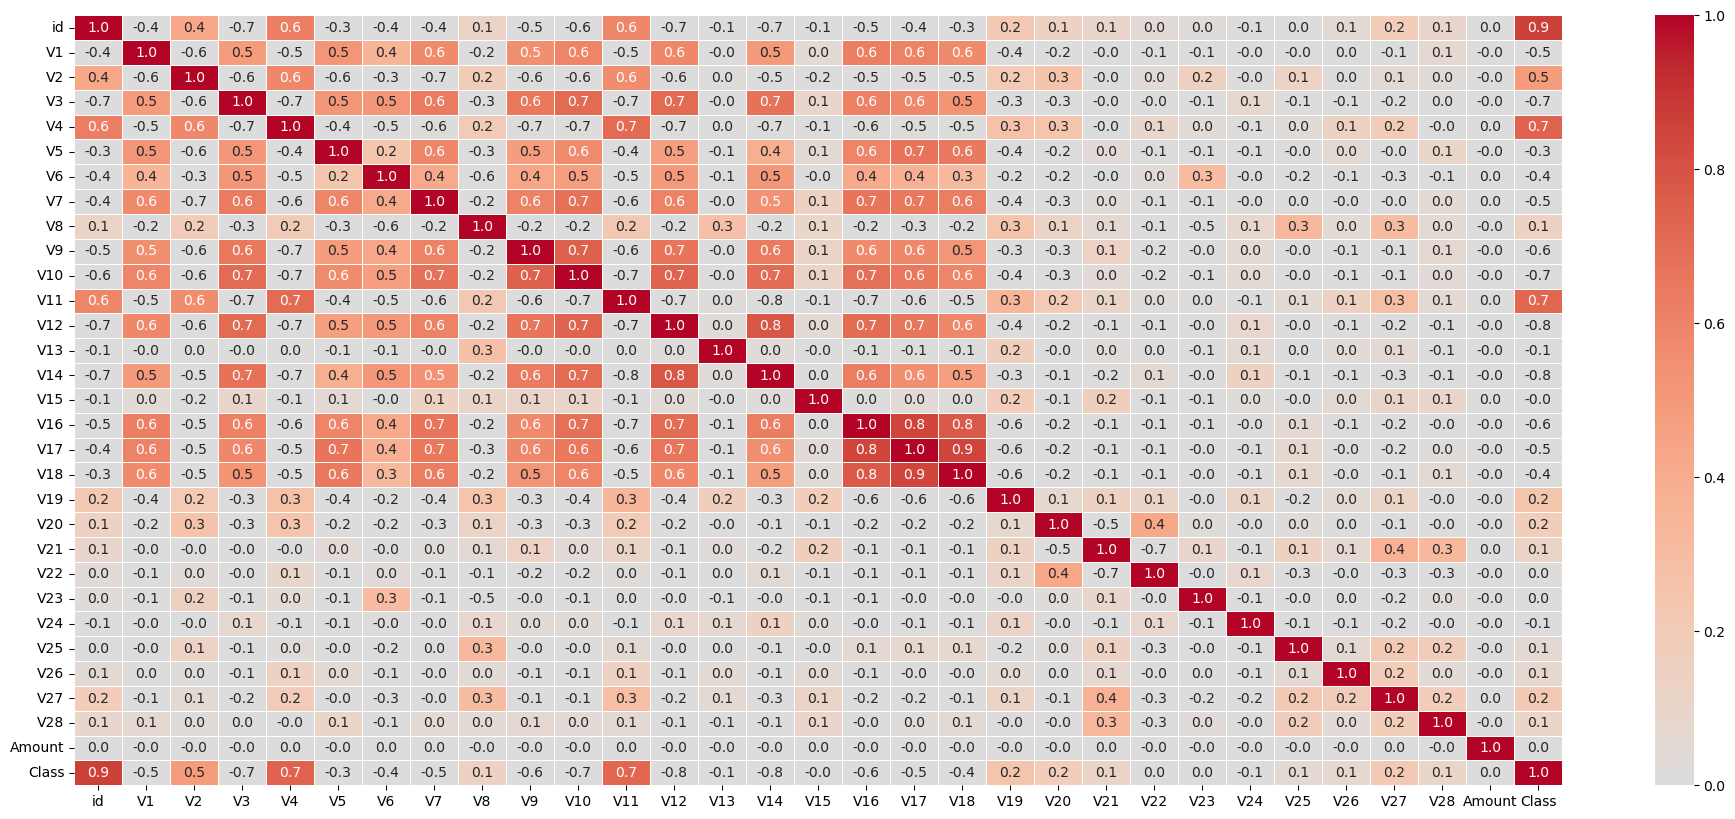

In [7]:
plt.figure(figsize=(24, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=True, linewidths=0.7, vmin=0, vmax=1, fmt='.1f')
plt.show()



3️⃣ CORRELATION ANALYSIS

Top 10 Positive Correlations with Fraud:
id        0.864283
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
Name: Class, dtype: float64

Top 10 Negative Correlations with Fraud:
V15   -0.037948
V13   -0.071105
V24   -0.130107
V5    -0.338639
V18   -0.410091
V6    -0.435088
V17   -0.476377
V7    -0.491234
V1    -0.505761
V16   -0.573511
V9    -0.585522
V10   -0.673665
V3    -0.682095
V12   -0.768579
V14   -0.805669
Name: Class, dtype: float64


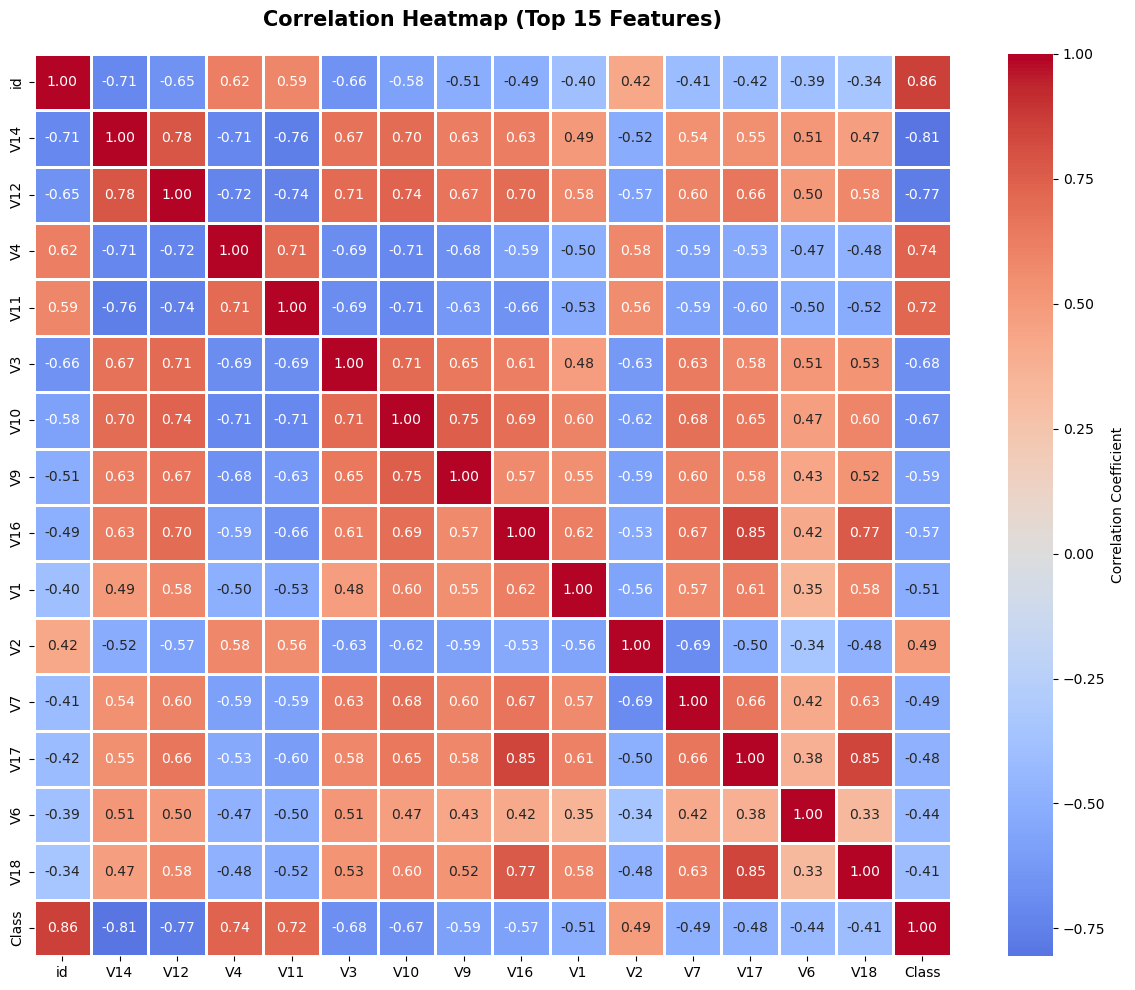

In [8]:
print("\n" + "="*60)
print("3️⃣ CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation with target
correlations = df.corr()['Class'].drop('Class').sort_values(ascending=False)
print("\nTop 10 Positive Correlations with Fraud:")
print(correlations.head(15))
print("\nTop 10 Negative Correlations with Fraud:")
print(correlations.tail(15))

# Plot correlation heatmap for top features
top_features = correlations.abs().nlargest(15).index.tolist() + ['Class']
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap (Top 15 Features)', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [9]:
missing_values = df.isnull().sum().sum()
print(f"{missing_values} missing values found.")


duplicates = df.duplicated().sum()
print(f"{duplicates} duplicate rows found.")


df.drop('id', axis=1, inplace=True)
print("Dropped 'id' column.")


print(f"\nNew Shape after Cleaning: {df.shape}")

0 missing values found.
0 duplicate rows found.
Dropped 'id' column.

New Shape after Cleaning: (568630, 30)


In [10]:
X = df.drop('Class', axis=1)
Y = df['Class']
df=X

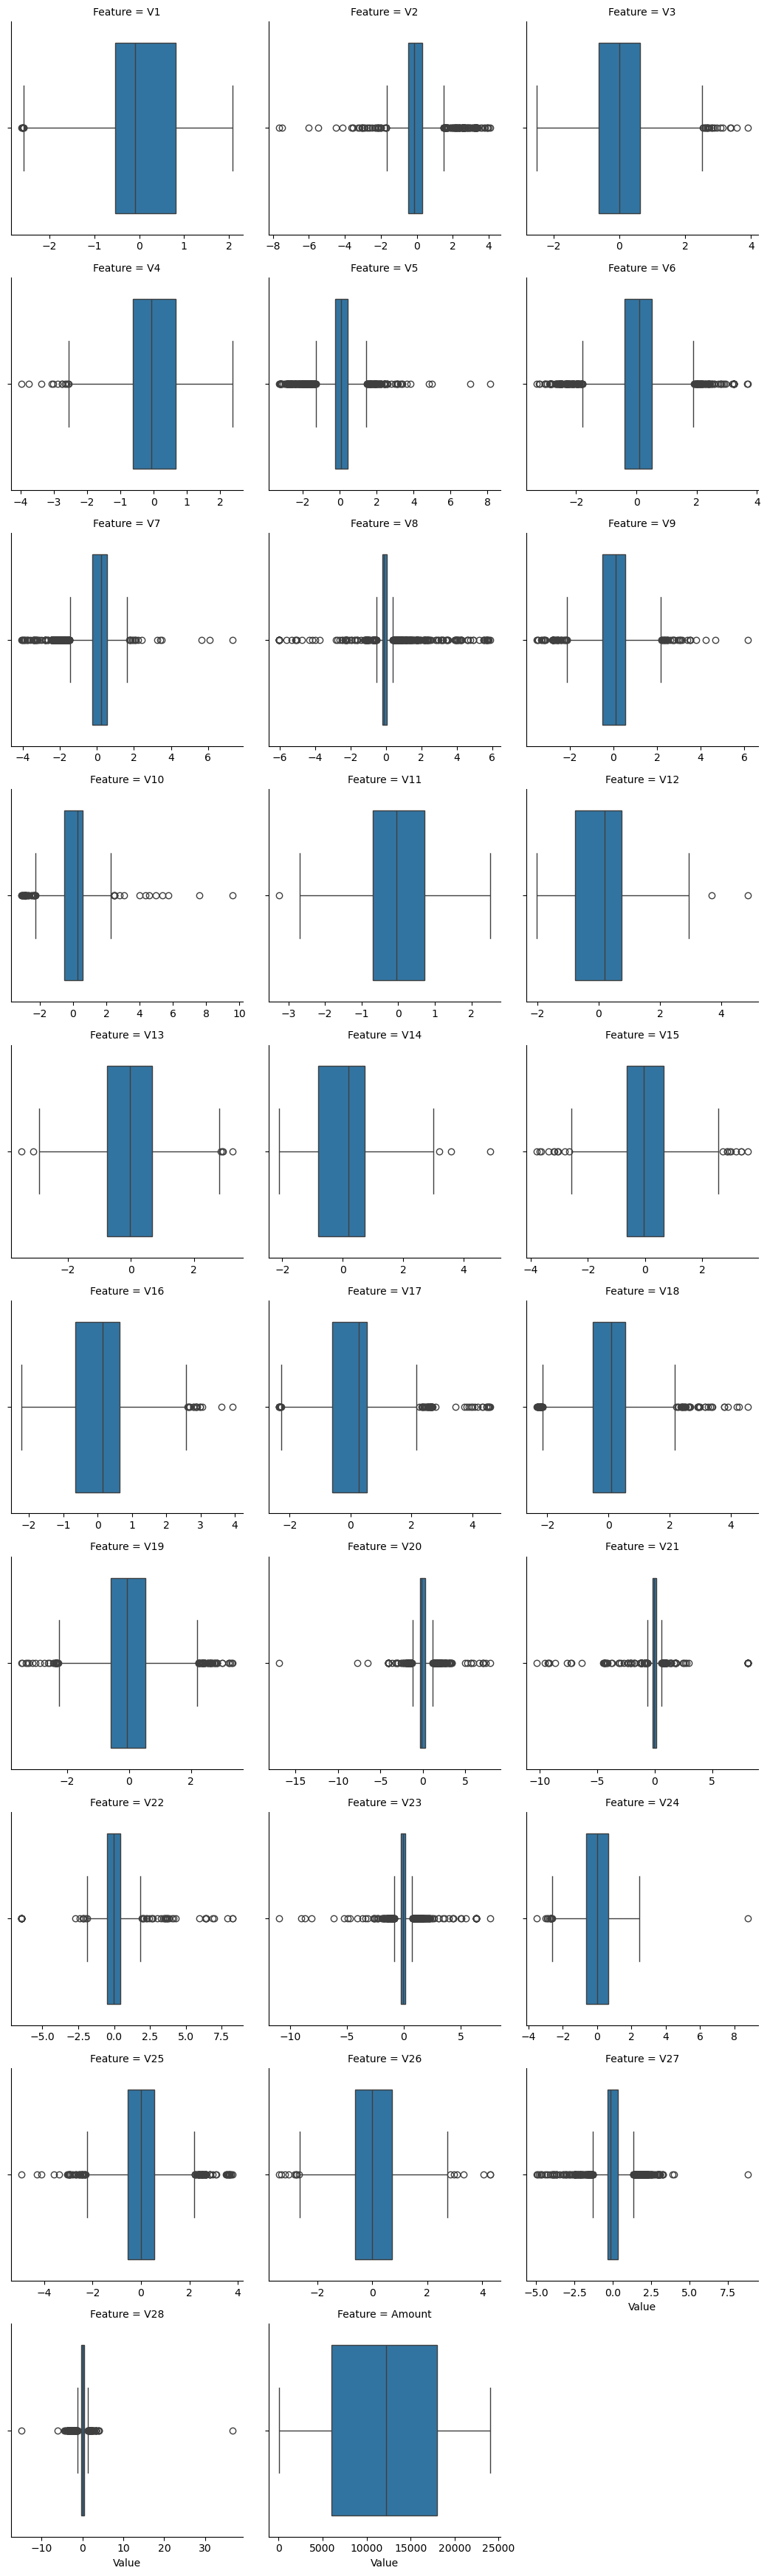

In [11]:
df_melted = df.sample(2000).melt(var_name='Feature', value_name='Value')

g = sns.FacetGrid(df_melted, col='Feature', col_wrap=3, sharex=False, sharey=False, height=3.5)
g.map(sns.boxplot, 'Value')
plt.show()

In [12]:
df_clip = df

for col in df_clip.select_dtypes(include='number').columns:
    Q1 = df_clip[col].quantile(0.25)
    Q3 = df_clip[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clip[col] = df_clip[col].clip(lower, upper)

In [13]:
outlier_counts = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_counts[col] = count

# عرض العدد لكل عمود
for col, count in outlier_counts.items():
    print(f"{col} → {count} outliers")


V1 → 0 outliers
V2 → 0 outliers
V3 → 0 outliers
V4 → 0 outliers
V5 → 0 outliers
V6 → 0 outliers
V7 → 0 outliers
V8 → 0 outliers
V9 → 0 outliers
V10 → 0 outliers
V11 → 0 outliers
V12 → 0 outliers
V13 → 0 outliers
V14 → 0 outliers
V15 → 0 outliers
V16 → 0 outliers
V17 → 0 outliers
V18 → 0 outliers
V19 → 0 outliers
V20 → 0 outliers
V21 → 0 outliers
V22 → 0 outliers
V23 → 0 outliers
V24 → 0 outliers
V25 → 0 outliers
V26 → 0 outliers
V27 → 0 outliers
V28 → 0 outliers
Amount → 0 outliers


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print("\nData Split Info:")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


Data Split Info:
Training Shape: (454904, 29)
Testing Shape: (113726, 29)


In [15]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


1️⃣ CLASS DISTRIBUTION ANALYSIS


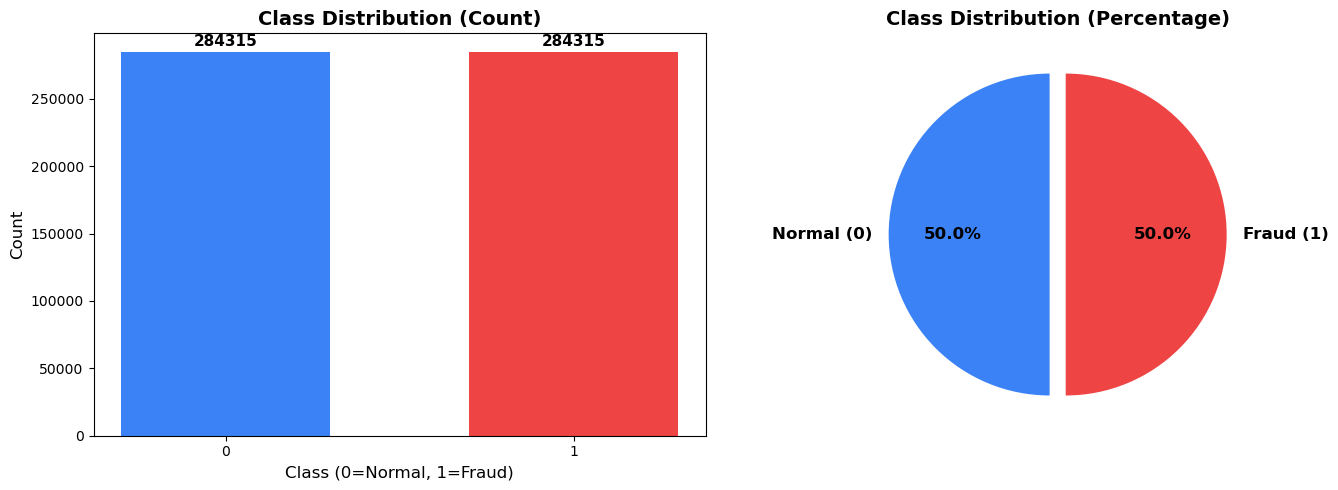


Class Distribution:
Class
0    284315
1    284315
Name: count, dtype: int64

Class Distribution (%):
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [16]:
print("\n" + "="*60)
print("1️⃣ CLASS DISTRIBUTION ANALYSIS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count Plot - استخدام matplotlib مباشرة
class_counts = Y.value_counts().sort_index()
axes[0].bar([0, 1], class_counts.values, color=['#3b82f6', '#ef4444'], width=0.6)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Normal, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticks([0, 1])

# Add counts on bars
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + max(class_counts.values)*0.01, str(v), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie Chart
colors = ['#3b82f6', '#ef4444']
explode = (0.05, 0.05)
axes[1].pie(class_counts, labels=['Normal (0)', 'Fraud (1)'], 
            autopct='%1.1f%%', colors=colors, explode=explode,
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nClass Distribution:")
print(Y.value_counts())
print(f"\nClass Distribution (%):")
print(Y.value_counts(normalize=True) * 100)

Best K = 2

Train Accuracy: 0.9999956034679844
Test Accuracy: 0.9990591421486731

Confusion Matrix:
 [[56763   100]
 [    7 56856]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



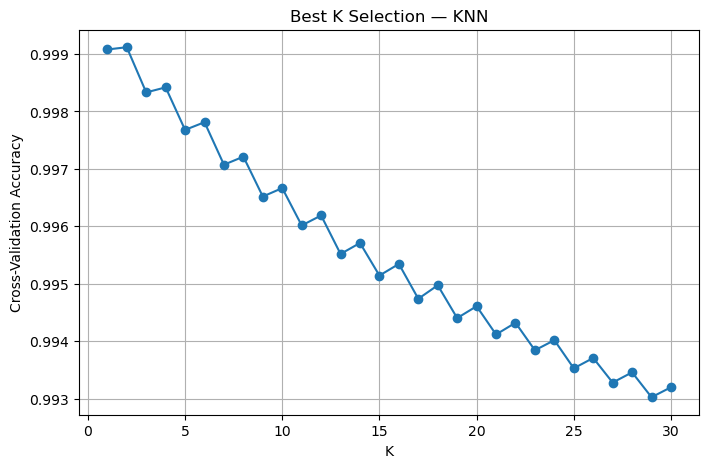

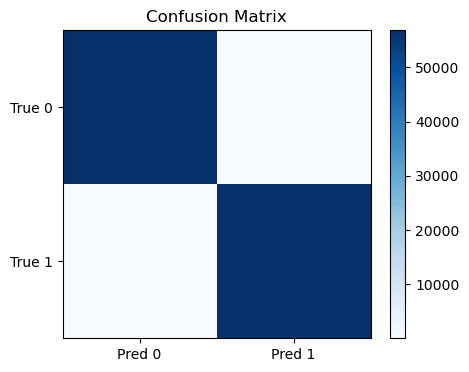

In [22]:

k_values = range(1, 31)
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train ,y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print("Best K =", best_k)


best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Prediction
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


#evaluation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print("\nTrain Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# ===================================================
# 5) Plots
# ===================================================

# Plot CV Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Best K Selection — KNN")
plt.grid(True)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
plt.show()
